<a href="https://colab.research.google.com/github/ElianGlz/IAyRN_2024/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Actividad 006 Elian Isac Gonzalez Lopez
#2082426
#N4

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


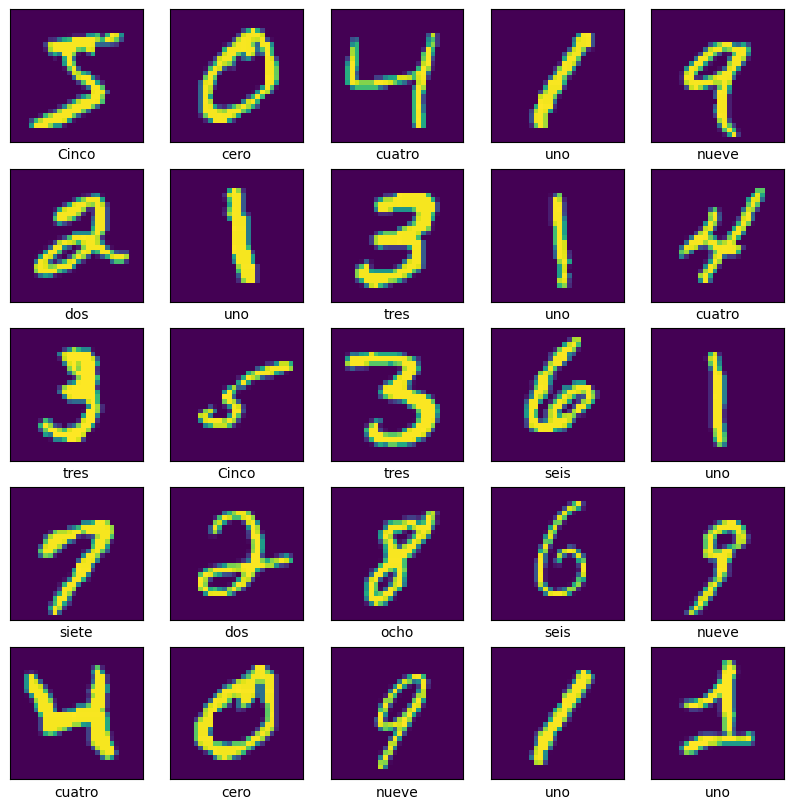

In [5]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'Cinco', 'seis', 'siete', 'ocho', 'nueve']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 63s 33ms/step - loss: 0.1456 - accuracy: 0.9555 - val_loss: 0.0459 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0378 - val_accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0275 - val_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0372 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0289 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0344 - val_accura

313/313 - 6s - loss: 0.0358 - accuracy: 0.9908 - 6s/epoch - 18ms/step


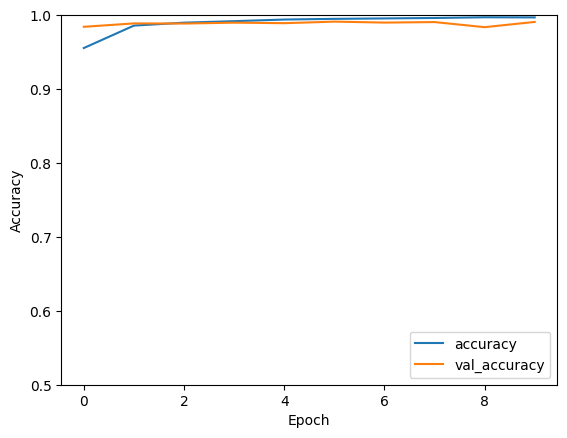

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.9908000230789185


In [ ]:
#¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
#10 epocas

#¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
#un mejor debido a que en este es de 0.9908